# Penguins_data adsgan syn

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [4]:
# Real penguins_data for reference
penguins_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

# Drop NaN values
penguins_real = penguins_real.dropna()

# Baseline train/test split
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

target = 'species'

penguins_length = penguins_real.shape[0]

# Testing multiple models on penguin_data

In [3]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan"]
result_name = "penguin_methods"

In [6]:
state = Load(penguins_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=penguins_length, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-03T12:45:01.766573+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]
[2024-05-03T12:47:55.631239+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-03T12:48:02.592554+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:00<00:00, 10.70it/s]
[2024-05-03T12:48:03.309443+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 12%|█▏        | 1199/10000 [02:10<15:58,  9.19it/s]
[2024-05-03T12:50:14.125089+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [7]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.036916,0.009019,0.963084,0.009019
1,pca_eigval_diff,u,0.146653,NaN,0.853347,NaN
2,pca_eigvec_ang,u,0.054362,NaN,0.982696,NaN
3,avg_cio,u,0.013339,0.007917,0.013339,0.007917
4,corr_mat_diff,u,1.674744,NaN,0.920250,NaN
5,mutual_inf_diff,u,1.232457,NaN,0.941312,NaN
6,ks_tvd_stat,u,0.107665,0.014520,0.892335,0.014520
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.026760,0.014737,0.973240,0.014737
9,avg_pMSE,u,0.020379,0.001763,0.918484,0.007052


In [8]:
results = pd.DataFrame(columns=["f1_diff", "f1_diff_holdout"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"], eval.loc["cls_F1_diff_hout", "val"]]
results

,f1_diff,f1_diff_holdout
tvae,0.195528,0.141791
bayesian_network,0.062666,0.052239
privbayes,0.489535,0.552239
adsgan,0.127393,0.059701
ctgan,0.055276,0.044776


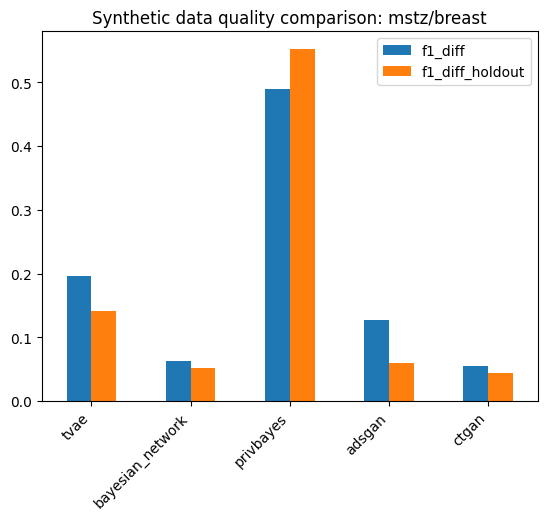

In [9]:
results.plot.bar()
plt.title("Synthetic data quality comparison: mstz/breast")
plt.xticks(rotation=45, ha="right")
plt.show()

# Actual adsgan training on penguins_data